<a href="https://colab.research.google.com/github/mrm8488/shared_colab_notebooks/blob/master/generate_colors_from_text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Keras model to generate colors

### Overview

1.  Choose a language model to best represent input text
2.  Clean and prepare data for training
3. Build a basic Keras sequential neural network model
4. Apply recurrent neural network (RNN) to process character sequences.
5. Generate 3 channel RGB color outputs.










![schema](https://gitcdn.xyz/cdn/Tony607/blog_statics/2bc83b36beab8672dcca45926f927b8189a74ec3/images/keras_colors/build_overview.png)

In [0]:
!ls -l

total 4
drwxr-xr-x 1 root root 4096 Apr 29 16:32 sample_data


In [0]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import pylab as plt

In [0]:
df = pd.read_csv("colors.csv")

In [0]:
df.head()

,name,red,green,blue
0,parakeet,174,182,87
1,saddle brown,88,52,1
2,cucumber crush,222,237,215
3,pool blue,134,194,201
4,distance,98,110,130


In [0]:
h = sorted(df['name'].str.len().as_matrix())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


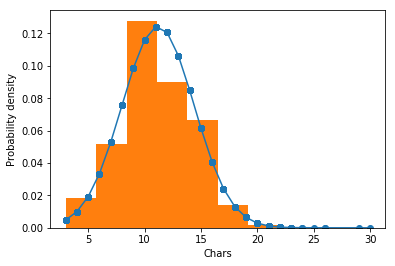

In [0]:
fit = stats.norm.pdf(h, np.mean(h), np.std(h))  #this is a fitting indeed
plt.plot(h,fit,'-o')
plt.hist(h,normed=True)      #use this to draw histogram of your data
plt.xlabel('Chars')
plt.ylabel('Probability density')
plt.show()

In [0]:
names = df['name'].values

In [0]:
from tensorflow.python.keras import preprocessing
from tensorflow.python.keras.preprocessing.text import Tokenizer

maxlen = 25
t = Tokenizer(char_level=True)
t.fit_on_texts(names)
tokenized = t.texts_to_sequences(names)
padded_names = preprocessing.sequence.pad_sequences(tokenized, maxlen=maxlen)

In [0]:
padded_names

array([[ 0,  0,  0, ...,  1,  1,  9],
       [ 0,  0,  0, ...,  8, 20,  6],
       [ 0,  0,  0, ..., 12, 10, 16],
       ...,
       [ 0,  0,  0, ...,  8,  6,  1],
       [ 0,  0,  0, ...,  1,  1,  6],
       [ 0,  0,  0, ...,  5, 11,  1]], dtype=int32)

### One-hot encoding

In [0]:
t.word_index

{' ': 4,
 'a': 2,
 'b': 18,
 'c': 11,
 'd': 13,
 'e': 1,
 'f': 22,
 'g': 14,
 'h': 16,
 'i': 5,
 'j': 26,
 'k': 21,
 'l': 7,
 'm': 17,
 'n': 6,
 'o': 8,
 'p': 15,
 'q': 25,
 'r': 3,
 's': 10,
 't': 9,
 'u': 12,
 'v': 23,
 'w': 20,
 'x': 27,
 'y': 19,
 'z': 24}

In [0]:
from keras.utils import np_utils
one_hot_names = np_utils.to_categorical(padded_names)

Using TensorFlow backend.


In [0]:
one_hot_names[0]

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0

In [0]:
one_hot_names.shape

(14157, 25, 28)

### Data normalization

In [0]:
# The RGB values are between 0 - 255
# scale them to be between 0 - 1
def norm(value):
    return value / 255.0

In [0]:
normalized_values = np.column_stack([norm(df["red"]), norm(df["green"]), norm(df["blue"])])

In [0]:
normalized_values[0]

array([0.68235294, 0.71372549, 0.34117647])

### Build the model

In [0]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Dropout, LSTM, Reshape

In [0]:
model = Sequential()
model.add(LSTM(256, return_sequences=True, input_shape=(maxlen, 28)))
model.add(LSTM(128))
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
model.compile(optimizer='adam', loss='mse', metrics=['acc'])

Instructions for updating:
Use tf.cast instead.


### Training

In [0]:
history = model.fit(one_hot_names, normalized_values,
                    epochs=40,
                    batch_size=32,
                    validation_split=0.1)

Train on 12741 samples, validate on 1416 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/40
12741/12741 [==============================] - 36s 3ms/sample - loss: 0.0601 - acc: 0.6332 - val_loss: 0.0601 - val_acc: 0.6716
Epoch 2/40
12741/12741 [==============================] - 33s 3ms/sample - loss: 0.0553 - acc: 0.6637 - val_loss: 0.0575 - val_acc: 0.6624
Epoch 3/40
12741/12741 [==============================] - 34s 3ms/sample - loss: 0.0525 - acc: 0.6624 - val_loss: 0.0558 - val_acc: 0.6751
Epoch 4/40
12741/12741 [==============================] - 33s 3ms/sample - loss: 0.0503 - acc: 0.6619 - val_loss: 0.0512 - val_acc: 0.6843
Epoch 5/40
12741/12741 [==============================] - 33s 3ms/sample - loss: 0.0479 - acc: 0.6652 - val_loss: 0.0500 - val_acc: 0.6893
Epoch 6/40
12741/12741 [==============================] - 34s 3ms/sample - loss: 0.0458 - acc: 0.6740 - val_loss: 0.0495 - val_acc: 0.6603
Epoch 7/40
12741/12741 [==============================] - 33s 3ms/sam

### Testing the model

In [0]:
# plot a color image
def plot_rgb(rgb):
    data = [[rgb]]
    plt.figure(figsize=(2,2))
    plt.imshow(data, interpolation='nearest')
    plt.show()

def scale(n):
    return int(n * 255) 

def predict(name):
    name = name.lower()
    tokenized = t.texts_to_sequences([name])
    padded = preprocessing.sequence.pad_sequences(tokenized, maxlen=maxlen)
    one_hot = np_utils.to_categorical(padded, num_classes=28)
    pred = model.predict(np.array(one_hot))[0]
    r, g, b = scale(pred[0]), scale(pred[1]), scale(pred[2])
    print(name + ',', 'R,G,B:', r,g,b)
    plot_rgb(pred)

tensorflow orange, R,G,B: 248 137 63


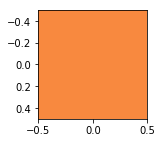

forest, R,G,B: 26 74 28


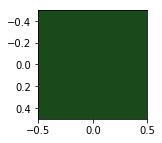

keras red, R,G,B: 147 38 60


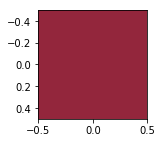

In [0]:
predict("tensorflow orange")
predict("forest")
predict("keras red")

clear blue, R,G,B: 36 117 211


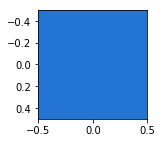

In [0]:
predict("clear blue")

red hell, R,G,B: 174 41 60


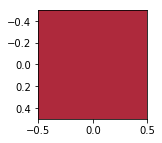

In [0]:
predict("red hell")

yellow submarine, R,G,B: 233 205 130


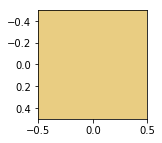

In [0]:
predict("yellow submarine")

In [0]:
model.save("colors.h5")

In [0]:

!pip install tensorflowjs 

    100% |████████████████████████████████| 13.9MB 2.6MB/s 
    100% |████████████████████████████████| 95.8MB 323kB/s 
    100% |████████████████████████████████| 81kB 17.4MB/s 
    100% |████████████████████████████████| 358kB 19.8MB/s 
    100% |████████████████████████████████| 61kB 21.9MB/s 
    100% |████████████████████████████████| 3.0MB 10.5MB/s 
featuretools 0.4.1 has requirement pandas>=0.23.0, but you'll have pandas 0.22.0 which is incompatible.
datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.8 which is incompatible.
  Found existing installation: numpy 1.14.6
    Uninstalling numpy-1.14.6:
      Successfully uninstalled numpy-1.14.6
  Found existing installation: tensorflow-hub 0.4.0
    Uninstalling tensorflow-hub-0.4.0:
      Successfully uninstalled tensorflow-hub-0.4.0


In [0]:
!mkdir model
!tensorflowjs_converter --input_format keras colors.h5 model/

In [0]:
!zip -r model.zip model

  adding: model/ (stored 0%)
  adding: model/model.json (deflated 80%)
  adding: model/group1-shard1of1.bin (deflated 7%)


In [0]:
from google.colab import files
files.download('model.zip')

In [0]:
!ls -l

total 8136
-rw-r--r-- 1 root root  331648 Apr 10 17:23 colors.csv
-rw-r--r-- 1 root root 6107176 Apr 10 19:41 colors.h5
drwxr-xr-x 2 root root    4096 Apr 10 19:41 model
-rw-r--r-- 1 root root 1878641 Apr 10 19:42 model.zip
drwxr-xr-x 1 root root    4096 Apr  4 20:20 sample_data


In [0]:
cd model

/content/model


In [0]:
!ls -l

total 1984
-rw-r--r-- 1 root root 2023436 Apr 10 19:41 group1-shard1of1.bin
-rw-r--r-- 1 root root    4085 Apr 10 19:41 model.json
